# gw2 3:2 Bifurcation Diagrams

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import gw2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, 
get_period, bif1d, follow_phase_diffs, phase_lock_r3d, follow_locking_3d)

from lib.rhs import _redu_3dc_gw as _redu_3dc

from lib.rhs import _redu_c,_full
from lib.plot_util import add_diagram_1d_scatter, quick_plot_combined

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-8,'atol':1e-8,'method':'LSODA'}

In [3]:
pd1 = {'v1':.84,'v2':.42,'v4':.35,'v6':.35,'v8':1,
           'k1':1,'k2':1,'k3':.7,'k4':1,'k5':.7,
           'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,
           'n':6,'L':0,'eps':0,'del':0,'om':1,'om_fix':1}

In [4]:
kws1 = {'var_names':['x','y','z','v'],
        'pardict':pd1,
        'rhs':gw2.rhs,
        'coupling':gw2.coupling,
        'init':np.array([.3882,.523,1.357,.4347,24.2]),
        'TN':10000,
        'trunc_order':3,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':0.5}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [6]:
eps_list32r = np.linspace(0.001,.1,50)
etup32 = (.001,.1,50)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='gw0',**kws1)
system2 = rsp(idx=1,model_name='gw1',**kws1)

mkdir ./data/gw0/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...
mkdir ./data/gw1/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [9]:
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',3),'_m':('om1',2),
         'NH':2048,'save_fig':False}

# del=0.0

In [10]:
del32_p0 = 0
a32_p0 = nm.nmCoupling(**kw_nm, del1=del32_p0)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


## Get Branches Full

In [11]:
kw_p0 = {'a':a32_p0,'del1':del32_p0,'recompute':False,
         'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [12]:
data_p0_list = []

In [13]:
in_dicts = [dict(init=0,eps_init=0.1,eps_final=0.009,deps=-.01),
           dict(init=0,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [14]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0)
    data_p0_list.append(dat)
fname = kw_p0['bifdir']+'hyper_gw2_32_p0.txt'

fname1 td_branch_init=0_nm=32_del=0_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=0_nm=32_del=0_ei=0.1_ef=0.009_de=-0.01.txt
init [0.36989302 0.51170413 1.37486086 0.12208537 0.15078954 0.72488035 2.46710484 0.08100549 6.38031463]
eps iter 0 0.1                
t1,t2 2.6239300861111072 2.0861580301324714                             
t1,t2 5.823249470892953 2.0861580301324714
periods [2.17978047 2.08398339 2.11655077 3.17871597 3.20159875]
eps iter 1 0.09000000000000001                
t1,t2 2.6317256533977074 2.083644173333326                              
t1,t2 5.832868135249847 2.083644173333326
periods [2.17137001 2.08627463 2.11338263 3.17597585 3.19505143]
eps iter 2 0.08000000000000002                
t1,t2 2.6363291742605064 2.0810313796088304                             
t1,t2 5.828200929877425 2.0810313796088304
periods [2.16291271 2.08830574 2.11044221 3.17303183 3.18862892]
eps iter 3 0.07000000000000002                
t1,t2 2.631125171364573 2.0772814066029675        

In [15]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [16]:
data_r3d_p0_list = []

In [ ]:
in_dicts = [dict(a=a32_p0,Y=[1,0,0],eps_init=0.1,eps_final=0.009,deps=-.01),
            dict(init=0,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [17]:
# find init for this branch
_,init = phase_lock_r3d(**in_dicts,a32_p0,.05,_redu_3dc)
print(init)

t_diff 1.75127436143962362, Y=[14.31764498 -0.04008436 -0.04001829]                                              
[ 1.7513 -0.0401 -0.04  ]


In [18]:
# bot 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [19]:
# bot 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [20]:
# find init for this branch
_,init = phase_lock_r3d([3,0,0],a32_p0,.05,_redu_3dc)

t_diff 3.30623125870095410, Y=[ 3.30623126 -0.0392795  -0.03915904]                                              


In [21]:
# top 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [22]:
# top 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [23]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0,.05,_redu_3dc)

t_diff 4.90858174861917808, Y=[ 4.90858175 -0.04028989 -0.04033299]                                              


In [24]:
# top 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [25]:
# top 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

## Plot

eps_min 0.03000000000000004


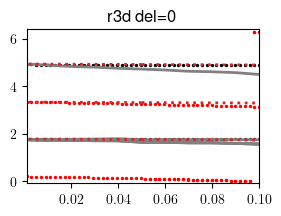

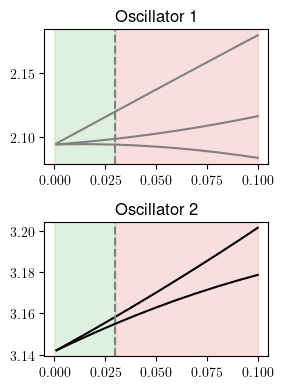

In [26]:
quick_plot_combined(a32_p0,
                    kw_f={'data_list':data_p0_list},
                    kw_r3d={'data_list':data_r3d_p0_list},
                    kw_r={'etup':etup32})

# del=0.002

In [27]:
del32_p002 = 0.002
a32_p002 = nm.nmCoupling(**kw_nm, del1=del32_p002)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


## Get Branches Full

In [28]:
kw_p002 = {'a':a32_p002, 'del1':del32_p002, 'recompute':False,
           'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [29]:
data_p002_list = []

In [30]:
in_dicts = [dict(init=2,eps_init=0.01,eps_final=0.11,deps=.01),
           dict(init=2,eps_init=0.01, eps_final=0.0005,deps=-.001)]

In [31]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p002)
    data_p002_list.append(dat)
fname = kw_p002['bifdir']+'hyper_gw2_32_p002.txt'

fname1 td_branch_init=2_nm=32_del=0.002_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=32_del=0.002_ei=0.01_ef=0.11_de=0.01.txt
init [0.38698004 0.52021521 1.35502794 0.12670555 0.01214263 0.22635293 2.99825013 0.00658813 6.29277715]
eps iter 0 0.01                
t1,t2 1.6892293016555129 2.0954227845238917                             
t1,t2 4.8494978495051315 2.0954227845238917
periods [2.09558143 2.09447202 2.10270689 3.14598925 3.14677082]
eps iter 1 0.02                
t1,t2 1.6819931663363301 2.092006113556913                              
t1,t2 4.831707905985673 2.092006113556913
periods [2.09643689 2.09475085 2.11101808 3.15050247 3.15170492]
eps iter 2 0.03                
t1,t2 1.6744387294371863 2.0945830304723465                             
t1,t2 4.8353532824303755 2.0945830304723465
periods [2.09697024 2.09522722 2.1193254  3.15511811 3.15640128]
eps iter 3 0.04                
t1,t2 1.6678794561429384 2.0961736792325376                             
t1,t2 4.84223

In [32]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [33]:
data_r3d_p002_list = []

In [34]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p002,.05,_redu_3dc)
print(init)

t_diff 6.25546374101923810, Y=[18.82183436 -0.05276157 -0.04236806]                                              
[ 6.2555 -0.0528 -0.0424]


In [35]:
# bot 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [36]:
# bot 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [37]:
# find init for this branch
_,init = phase_lock_r3d([3,0,0],a32_p002,.05,_redu_3dc)

t_diff 3.10245106554289311, Y=[ 3.10245107 -0.05324383 -0.04272729]                                              


In [38]:
# top 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [39]:
# top 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [40]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p002,.05,_redu_3dc)

t_diff 5.13353937714983509, Y=[ 5.13353938 -0.05404569 -0.04377044]                                              


In [41]:
# top 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [42]:
# top 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

## Plot

eps_min 0.03


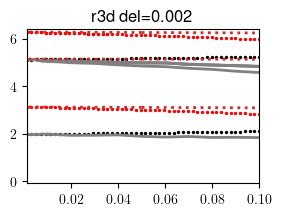

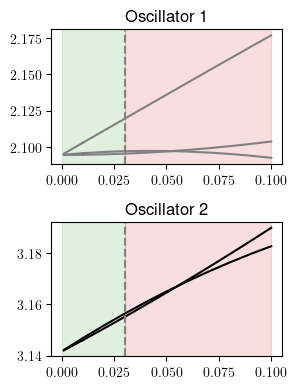

In [43]:
quick_plot_combined(a32_p002,
                    kw_f={'data_list':data_p002_list},
                    kw_r3d={'data_list':data_r3d_p002_list},
                    kw_r={'etup':etup32})

# del=0.0045

In [44]:
del32_p0045 = 0.0045
a32_p0045 = nm.nmCoupling(**kw_nm, del1=del32_p0045)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


## Get Branches Full

In [45]:
kw_p0045 = {'a':a32_p0045,'del1':del32_p0045,'recompute':False,
            'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [46]:
data_p0045_list = []

In [47]:
in_dicts = [dict(init=0,eps_init=0.01,eps_final=0.11,deps=.01),
           dict(init=0,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [48]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0045)
    data_p0045_list.append(dat)
fname = kw_p0045['bifdir']+'hyper_gw2_32_p0045.txt'

fname1 td_branch_init=0_nm=32_del=0.0045_ei=0.01_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0_nm=32_del=0.0045_ei=0.01_ef=0.11_de=0.01.txt
init [3.86715485e-01 5.20030802e-01 1.35519346e+00 1.26626668e-01 1.13148872e-02 2.13557404e-01 2.97387273e+00 6.06732552e-03 6.29078742e+00]
eps iter 0 0.01                
t1,t2 1.7947467818884366 2.0752734736597933                             
t1,t2 4.937188984861085 2.0752734736597933
periods [2.0971999  2.09274101 2.10228334 3.14454413 3.14767534]
eps iter 1 0.02                
t1,t2 1.7835092086629756 2.077116144683583                              
t1,t2 4.9331388706074435 2.077116144683583
periods [2.09950323 2.09139109 2.11019111 3.14766195 3.15342346]
eps iter 2 0.03                
t1,t2 1.7624124784456994 2.0814871188183313                             
t1,t2 4.916896124362313 2.0814871188183313
periods [2.10137176 2.09029965 2.11811585 3.15094041 3.15884684]
eps iter 3 0.04                
t1,t2 1.7604179798901745 2.082132143915877       

In [49]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [50]:
data_r3d_p0045_list = []

In [51]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p0045,.02,_redu_3dc)
print(init)

t_diff 2.36481962399819421, Y=[ 2.74975609e+01 -2.80262484e-02 -1.88047958e-02]                                              
[ 2.3648 -0.028  -0.0188]


In [52]:
# bot 1f
dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [53]:
# bot 1b
dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [54]:
# # find init for this branch
# _,init = phase_lock_r3d([3,0,0],a32_p0045,.02,_redu_3dc)

In [55]:
# # top 1f
# dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0045_list.append(dat)

In [56]:
# # top 1b
# dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.001),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0045_list.append(dat)

In [57]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0045,.02,_redu_3dc)

t_diff 5.52596100080920210, Y=[ 5.525961   -0.02796602 -0.01882862]                                              


In [58]:
# top 1f
dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [59]:
# top 1b
dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

## Plot

eps_min 0.04


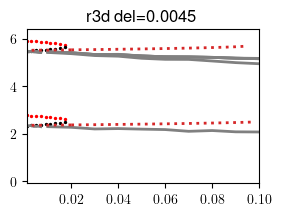

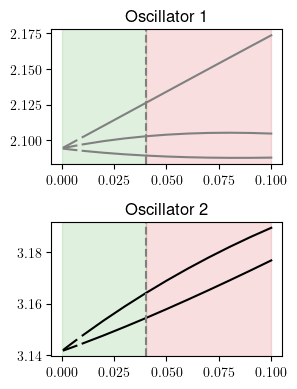

In [60]:
quick_plot_combined(a32_p0045,
                    kw_f={'data_list':data_p0045_list},
                    kw_r3d={'data_list':data_r3d_p0045_list},
                    kw_r={'etup':etup32})

# del=0.0047

In [61]:
del32_p0047 = 0.0047
a32_p0047 = nm.nmCoupling(**kw_nm, del1=del32_p0047)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...


## Get Branches Full

In [62]:
kw_p0047 = {'a':a32_p0047,'del1':del32_p0047,'recompute':False,
            'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [63]:
data_p0047_list = []

In [64]:
in_dicts = [dict(init=2,eps_init=0.005,eps_final=0.11,deps=.01),
            dict(init=2,eps_init=0.005,eps_final=0.0005,deps=-.001)]

In [65]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0047)
    data_p0047_list.append(dat)
fname = kw_p0047['bifdir']+'hyper_gw2_32_p0047.txt'

fname1 td_branch_init=2_nm=32_del=0.0047_ei=0.005_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=32_del=0.0047_ei=0.005_ef=0.11_de=0.01.txt
init [0.38752366 0.52051788 1.35472976 0.12686129 0.2618548  0.75444536 1.94524257 0.12555626 6.2875255 ]
eps iter 0 0.005                
t1,t2 2.8593885180276635 2.077324281834301                              
t1,t2 6.007080524408654 2.077324281834301
periods [2.09830669 2.0959817  2.09342855 3.1447552  3.14296173]
eps iter 1 0.015                
t1,t2 2.8587500783541313 2.088064667780244                              
t1,t2 6.004861203648691 2.088064667780244
periods [2.10616915 2.09870113 2.09177169 3.15076229 3.14588153]
eps iter 2 0.024999999999999998                
t1,t2 2.8552880512261334 2.093287343084016                              
t1,t2 6.00441011985365 2.093287343084016
periods [2.11405346 2.10092218 2.09041719 3.15642199 3.14896381]
eps iter 3 0.034999999999999996                
t1,t2 2.8580672420516766 2.105638329841062           

In [66]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [67]:
data_r3d_p0047_list = []

In [68]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p0047,.02,_redu_3dc)
print(init)

t_diff 2.43338447520242708, Y=[ 2.75661257e+01 -2.85492734e-02 -1.89133340e-02]                                              
[ 2.4334 -0.0285 -0.0189]


In [69]:
# bot 1f
dat = follow_locking_3d(init,a32_p0047,(.02,.054,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [70]:
# bot 1b
dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [71]:
# # find init for this branch
# _,init = phase_lock_r3d([3,0,0],a32_p0047,.02,_redu_3dc)

In [72]:
# # top 1f
# dat = follow_locking_3d(init,a32_p0047,(.02,.056,.002),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0047_list.append(dat)

In [73]:
# # top 1b
# dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.001),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0047_list.append(dat)

In [74]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0047,.02,_redu_3dc)

t_diff 5.59701348743240512, Y=[ 5.59701349 -0.02846867 -0.0189173 ]                                              


In [75]:
# top 1f
dat = follow_locking_3d(init,a32_p0047,(.02,.05,.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [76]:
# top 1b
dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

## Plot

eps_min 0.024999999999999998


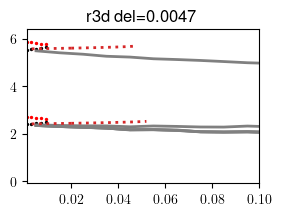

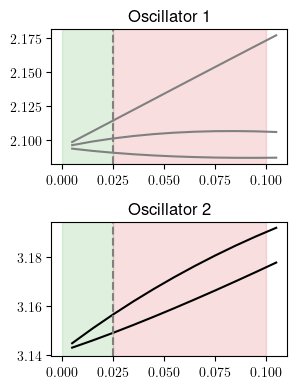

In [77]:
quick_plot_combined(a32_p0047,
                    kw_f={'data_list':data_p0047_list},
                    kw_r3d={'data_list':data_r3d_p0047_list},
                    kw_r={'etup':etup32})

## Sims

In [78]:
# coupling and init
eps32_p0047 = 0.09
th_init32_p0047 = 2

In [79]:
# sim params
dt = .01;T_p0047=1000
t32_p0047 = np.arange(0,T_p0047,dt)
args32_p0047 = {'args':(a32_p0047,eps32_p0047,del32_p0047),
             't_eval':t32_p0047,**kw_sim,'dense_output':True}

In [80]:
# initialize and run full
y0a = a32_p0047.system1.lc['dat'][int((th_init32_p0047/(2*np.pi)) * a32_p0047.system1.TN),:]
y0b = a32_p0047.system2.lc['dat'][int((0/(2*np.pi)) * a32_p0047.system2.TN),:]

y0_p0047 = np.array([y0a,y0b]).flatten()

solf32_p0047 = solve_ivp(_full,[0,t32_p0047[-1]],
                        y0_p0047, **args32_p0047)

In [81]:
solr32_p0047 = solve_ivp(_redu_c,[0,t32_p0047[-1]],
                     [th_init32_p0047],**args32_p0047)

In [82]:
# solr12b_p0047 = solve_ivp(_redu_3dc,[0,t32_p0047[-1]],
#                     [th_init32_p0047,0,0],**args32_p0047)

In [83]:
tp12a_p0047, phase12a_p0047 = get_phase(t32_p0047,solf32_p0047.y.T[:,:4],
                            skipn=50,system1=a32_p0047.system1)
tp12b_p0047, phase12b_p0047 = get_phase(t32_p0047,solf32_p0047.y.T[:,4:],
                            skipn=50,system1=a32_p0047.system2)

(-0.5, 6.783185307179586)

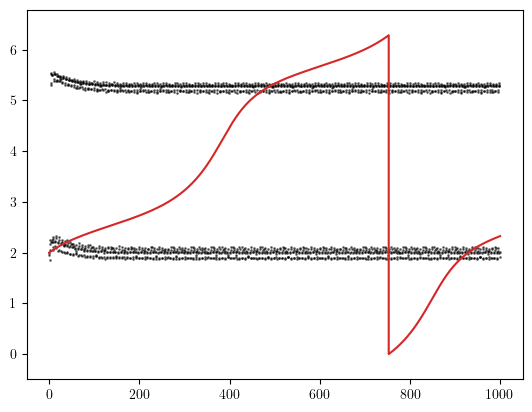

In [84]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0047 - a32_p0047.om*phase12b_p0047,2*np.pi)
axs.scatter(tp12a_p0047,y,s=1,alpha=.5,color='black')

axs.plot(t32_p0047,np.mod(solr32_p0047.y.T,2*np.pi),
         color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

## Integrate Reduced Check

In [85]:
# # multiple initial conditions
# init_phases32_p0047 = np.linspace(0,2*np.pi,6,endpoint=False)
# t3d_p0047 = np.arange(0,5000,.01)

# sols_3d = []
# sols_1d = []

# for i in range(len(init_phases32_p0047)):
#     sol3d_p0047 = solve_ivp(_redu_3dc,[0,t3d_p0047[-1]],
#                            [init_phases32_p0047[i],0,0],
#                            args=(a32_p0047,.05),t_eval=t3d_p0047)
    
#     # sol1d_p0047 = solve_ivp(_redu_c,[0,t3d_p0047[-1]],
#     #                        [init_phases32_p0047[i]],
#     #                        args=(a32_p0047,.05),t_eval=t3d_p0047)
    
#     sols_3d.append(sol3d_p0047)
#     # sols_1d.append(sol1d_p0047)

In [86]:
# fig,axs = plt.subplots(figsize=(6,2))
# for i in range(len(init_phases32_p0047)):
#     axs.plot(t3d_p0047,sols_3d[i].y[0],color='blue')
#     # axs.plot(t3d_p0047,sols_1d[i].y[0],color='red')
#     print('phase',init_phases32_p0047[i],sols_3d[i].y.T[-1,:])